## 6. Decision Trees and Ensemble Learning

This week, we'll talk about decision trees and tree-based ensemble algorithms

## 6.1 Credit risk scoring project

. Dataset: https://github.com/gastonstat/CreditScoring

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Data Cleaning and preparation
•	Downloading the dataset

•	Re-encoding the categorical variables

•	Doing train/validation/test splits


In [2]:
df = pd.read_csv('C:/Users/justine.o_kobo360/Desktop/ML ZoomCamp Tutorials/Jupyter notebook/Decision tree and Ensemble learning/CreditScoring.csv')

In [3]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [4]:
df.columns = df.columns.str.lower()

In [5]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

In [7]:
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

In [8]:
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

In [9]:
job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [10]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [11]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
seniority,4455.0,8.0,8.0,0.0,2.0,5.0,12.0,48.0
time,4455.0,46.0,15.0,6.0,36.0,48.0,60.0,72.0
age,4455.0,37.0,11.0,18.0,28.0,36.0,45.0,68.0
expenses,4455.0,56.0,20.0,35.0,35.0,51.0,72.0,180.0
income,4455.0,763317.0,8703625.0,0.0,80.0,120.0,166.0,99999999.0
assets,4455.0,1060341.0,10217569.0,0.0,0.0,3500.0,6000.0,99999999.0
debt,4455.0,404382.0,6344253.0,0.0,0.0,0.0,0.0,99999999.0
amount,4455.0,1039.0,475.0,100.0,700.0,1000.0,1300.0,5000.0
price,4455.0,1463.0,628.0,105.0,1118.0,1400.0,1692.0,11140.0


In [12]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999.0, value=np.nan)

In [13]:
df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
seniority,4455.0,8.0,8.0,0.0,2.0,5.0,12.0,48.0
time,4455.0,46.0,15.0,6.0,36.0,48.0,60.0,72.0
age,4455.0,37.0,11.0,18.0,28.0,36.0,45.0,68.0
expenses,4455.0,56.0,20.0,35.0,35.0,51.0,72.0,180.0
income,4421.0,131.0,86.0,0.0,80.0,120.0,165.0,959.0
assets,4408.0,5403.0,11573.0,0.0,0.0,3000.0,6000.0,300000.0
debt,4437.0,343.0,1246.0,0.0,0.0,0.0,0.0,30000.0
amount,4455.0,1039.0,475.0,100.0,700.0,1000.0,1300.0,5000.0
price,4455.0,1463.0,628.0,105.0,1118.0,1400.0,1692.0,11140.0


In [14]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [15]:
df.status.value_counts()

ok         3200
default    1254
Name: status, dtype: int64

In [16]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df_full_train, df_test = train_test_split(df, test_size=.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=.25, random_state=11)

In [19]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [20]:
y_train = (df_train.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values
y_val = (df_val.status == 'default').astype('int').values

In [21]:
del df_train['status']
del df_test['status']
del df_val['status']

## 6.3 Decision trees
•	How a decision tree looks like 

•	Training a decision tree

•	Overfitting

•	Controlling the size of a tree


In [22]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'partime':
            return 'ok'
        else:
            return 'default'
    if client['assets'] > 6000:
        return 'ok'
    else:
        return 'default'
            

In [23]:
xi = df_train.iloc[0].to_dict()

In [24]:
assess_risk(xi)

'ok'

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [26]:
train_dict = df_train.fillna(0).to_dict(orient='records')



In [27]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)

In [28]:
X_train

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [29]:
val_dict = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dict)


### Tuning parameters

In [30]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train auc : %.3f' % auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val auc: %.3f' % auc)

train auc : 0.776
val auc: 0.739


In [32]:
from sklearn.tree import export_text

In [33]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



## 6.4 Decision tree learning algorithm

•	Finding the best split for one column 

•	Finding the best split for the entire dataset

•	Stopping criteria

•	Decision tree learning algorithm


In [34]:
data = [
    [8000, 'default'], 
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])

In [35]:
df_example = df_example.sort_values('assets')
df_example

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [36]:
from IPython.display import display

In [37]:
# Misclassification Rate 

T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]
    
print(T)
    
display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_right.status.value_counts(normalize=True))

4000


,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok


default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


ok         0.75
default    0.25
Name: status, dtype: float64


In [38]:
Ts = [0, 2000, 3000, 5000, 8000]

for T in Ts:
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    print(T)
    
    display(df_left)
    print(df_left.status.value_counts(normalize=True).round(2))
    display(df_right)
    print(df_right.status.value_counts(normalize=True).round(2))

0


,assets,status
2,0,default


default    1.0
Name: status, dtype: float64


,assets,status
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


ok         0.57
default    0.43
Name: status, dtype: float64
2000


,assets,status
2,0,default
1,2000,default


default    1.0
Name: status, dtype: float64


,assets,status
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


ok         0.67
default    0.33
Name: status, dtype: float64
3000


,assets,status
2,0,default
1,2000,default
7,3000,default


default    1.0
Name: status, dtype: float64


,assets,status
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


ok         0.8
default    0.2
Name: status, dtype: float64
5000


,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


default    0.5
ok         0.5
Name: status, dtype: float64
8000


,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default


default    0.57
ok         0.43
Name: status, dtype: float64


,assets,status
6,9000,ok


ok    1.0
Name: status, dtype: float64


In [39]:
# more than one features

data = [
    [8000, 3000, 'default'], 
    [2000, 1000, 'default'],
    [0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000,1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],
]


df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [40]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [41]:
thresholds = { 'assets': [0, 2000, 3000, 5000, 8000],
             'debt': [500, 1000, 2000]
            }

In [42]:
for feature, Ts in thresholds.items():
    print('#################')
    print(feature)
    for T in Ts:
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
    
        print(T)
    
        display(df_left)
        print(df_left.status.value_counts(normalize=True).round(2))
        display(df_right)
        print(df_right.status.value_counts(normalize=True).round(2))
        
        print()
    print('#################')
    

#################
assets
0


,assets,debt,status
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.57
default    0.43
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.67
default    0.33
Name: status, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.8
default    0.2
Name: status, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


default    0.5
ok         0.5
Name: status, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.57
ok         0.43
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64

#################
#################
debt
500


,assets,debt,status
6,9000,500,ok


ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


default    0.57
ok         0.43
Name: status, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


ok         0.67
default    0.33
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


default    1.0
Name: status, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


ok         0.57
default    0.43
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


default    1.0
Name: status, dtype: float64

#################


## 6.5 Decision trees parameter tuning

•	Selecting max_depth

•	Selecting min_samples_leaf


In [43]:
dt = DecisionTreeClassifier

In [44]:
for depth in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.767
   6 -> 0.761
  10 -> 0.696
  15 -> 0.657
  20 -> 0.655
None -> 0.658


In [45]:
scores = []

for d  in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 50, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        #print('(%4s, %3d) -> %.3f' % (s, d, auc))
        scores.append((d, s, auc))

In [46]:
columns = ['max_depth', 'min_sample_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values('auc', ascending=False).head()

,max_depth,min_sample_leaf,auc
24,6,15,0.785319
23,6,10,0.777521
27,6,100,0.776434
25,6,20,0.774279
15,5,20,0.774028


In [47]:
df_scores_pivot = df_scores.pivot(index='min_sample_leaf',
                                  columns=['max_depth'], 
                                  values=['auc'])
df_scores_pivot

auc                    
max_depth               4         5         6
min_sample_leaf                              
1                0.761283  0.766938  0.754160
2                0.761283  0.766496  0.759224
5                0.761283  0.768173  0.761552
10               0.761283  0.761809  0.777521
15               0.763726  0.772142  0.785319
20               0.760910  0.774028  0.774279
50               0.753457  0.766753  0.770289
100              0.755937  0.763384  0.776434
200              0.747260  0.759073  0.768267
500              0.679842  0.679842  0.679842

<AxesSubplot:xlabel='None-max_depth', ylabel='min_sample_leaf'>

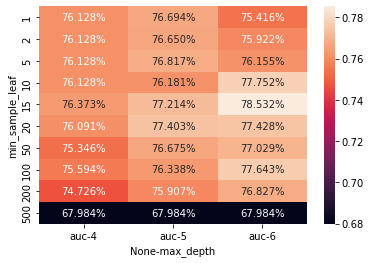

In [48]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3%')

In [49]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.7733374100893656

## 6.6 Ensembles and random forest

•	Board of experts

•	Ensembling models

•	Random forest - ensembling decision

•	Tuning random forest


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [52]:
y_pred = rf.predict_proba(X_val)[:,1]

In [53]:
auc = roc_auc_score(y_val, y_pred)
auc

0.7744726453706618

In [67]:
moves = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    moves.append((n, auc))

In [68]:
df_scores = pd.DataFrame(moves, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.803532
2,30,0.815075
3,40,0.815686
4,50,0.817082
5,60,0.816458
6,70,0.817321
7,80,0.816307
8,90,0.816824
9,100,0.817599


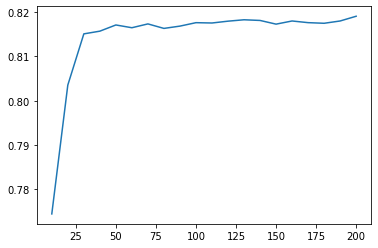

In [69]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [70]:
moves = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d, 
                                    random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        moves.append((d, n, auc))

In [78]:
df_scores = pd.DataFrame(moves, columns=['max_depth', 'n_estimators', 'auc'])
df_scores.sort_values('auc', ascending=False)

,max_depth,n_estimators,auc
35,10,160,0.825243
39,10,200,0.824923
37,10,180,0.824801
36,10,170,0.824632
38,10,190,0.824535
32,10,130,0.824517
34,10,150,0.824166
33,10,140,0.824129
31,10,120,0.823227
30,10,110,0.822646


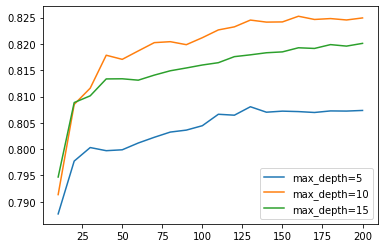

In [77]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' % d)
    
plt.legend()

In [85]:
max_depth = 10

In [90]:
moves = []
for s in [1, 3, 5, 9, 10, 15, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)
    
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        moves.append((max_depth, s, n, auc))

In [91]:
df_scores = pd.DataFrame(moves, columns=['max_depth', 'min_sample_leaf', 'n_estimators', 'auc'])
df_scores.sort_values('auc', ascending=False)

,max_depth,min_sample_leaf,n_estimators,auc
58,10,5,190,0.825952
35,10,3,160,0.825655
59,10,5,200,0.825383
52,10,5,130,0.825286
37,10,3,180,0.825268
...,...,...,...,...
126,10,50,70,0.804712
127,10,50,80,0.804410
122,10,50,30,0.803562
120,10,50,10,0.798891


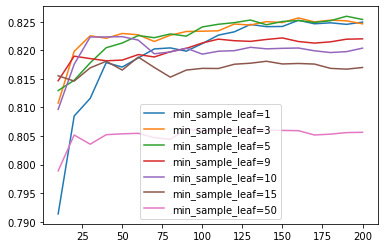

In [92]:
for s in [1, 3, 5, 9, 10, 15, 50]:
    df_subset = df_scores[df_scores.min_sample_leaf == s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label='min_sample_leaf=%s' % s)
    
plt.legend()

In [93]:
min_sample_leaf = 3

In [96]:
rf = RandomForestClassifier(n_estimators=160, 
                            max_depth=max_depth,
                            min_samples_leaf=min_sample_leaf,
                            random_state=1)
rf.fit(X_train, y_train)
    
y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print(auc)

0.8256551064396599


Other useful parameters:
    
•	Max_features

•	Bootstrap

https:scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html




## 6.7 Gradient boosting and XGBoost

•	Gradient boosting vs random forest

•	Installing XGBoost

•	Training the first model

•	Performance monitoring

•	Parsing xgboost’s monitoring output



In [98]:
import xgboost as xgb

In [267]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [105]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'nthread':8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [106]:
y_pred = model.predict(dval)


In [107]:
roc_auc_score(y_val, y_pred)

0.8152745150274878

In [108]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [113]:

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread':8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist,
                  num_boost_round=200)


[0]	train-auc:0.86300	val-auc:0.76818
[1]	train-auc:0.88485	val-auc:0.79410
[2]	train-auc:0.89923	val-auc:0.80017
[3]	train-auc:0.90951	val-auc:0.80886
[4]	train-auc:0.91967	val-auc:0.80414
[5]	train-auc:0.92863	val-auc:0.80606
[6]	train-auc:0.93385	val-auc:0.80949
[7]	train-auc:0.93880	val-auc:0.81101
[8]	train-auc:0.94150	val-auc:0.81445
[9]	train-auc:0.94581	val-auc:0.81527
[10]	train-auc:0.95002	val-auc:0.81558
[11]	train-auc:0.95342	val-auc:0.81679
[12]	train-auc:0.95555	val-auc:0.81821
[13]	train-auc:0.95985	val-auc:0.81677
[14]	train-auc:0.96176	val-auc:0.81801
[15]	train-auc:0.96558	val-auc:0.81680
[16]	train-auc:0.96741	val-auc:0.81807
[17]	train-auc:0.96981	val-auc:0.81808
[18]	train-auc:0.97083	val-auc:0.81901
[19]	train-auc:0.97252	val-auc:0.81732
[20]	train-auc:0.97316	val-auc:0.81775
[21]	train-auc:0.97469	val-auc:0.81765
[22]	train-auc:0.97678	val-auc:0.81865
[23]	train-auc:0.97925	val-auc:0.81786
[24]	train-auc:0.98104	val-auc:0.81937
[25]	train-auc:0.98174	val-auc:0.81

In [115]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread':8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)


[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	train-auc:0.98174	val-auc:0.81878
[30]	train-auc:0.98772	val-auc:0.81787
[35]	train-auc:0.99180	val-auc:0.81510
[40]	train-auc:0.99456	val-auc:0.81387
[45]	train-auc:0.99596	val-auc:0.81462
[50]	train-auc:0.99688	val-auc:0.81128
[55]	train-auc:0.99787	val-auc:0.80874
[60]	train-auc:0.99889	val-auc:0.80801
[65]	train-auc:0.99919	val-auc:0.80751
[70]	train-auc:0.99944	val-auc:0.80732
[75]	train-auc:0.99964	val-auc:0.80692
[80]	train-auc:0.99985	val-auc:0.80677
[85]	train-auc:0.99986	val-auc:0.80671
[90]	train-auc:0.99992	val-auc:0.80637
[95]	train-auc:0.99996	val-auc:0.80580
[100]	train-auc:0.99998	val-auc:0.80508
[105]	train-auc:0.99999	val-auc:0.80603
[110]	train-auc:1.00000	val-auc:0.80527
[115]	train-auc:1.00000	val-auc:0.80382
[120]	train-auc:1.00000	val-auc:0.80431
[125]	train-auc:1.0000

In [190]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight':1,
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread':8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)


In [191]:
s = output.stdout

In [192]:
print(s)

[0]	train-auc:0.86300	val-auc:0.76818
[5]	train-auc:0.92863	val-auc:0.80606
[10]	train-auc:0.95002	val-auc:0.81558
[15]	train-auc:0.96558	val-auc:0.81680
[20]	train-auc:0.97316	val-auc:0.81775
[25]	train-auc:0.98174	val-auc:0.81878
[30]	train-auc:0.98772	val-auc:0.81787
[35]	train-auc:0.99180	val-auc:0.81510
[40]	train-auc:0.99456	val-auc:0.81387
[45]	train-auc:0.99596	val-auc:0.81462
[50]	train-auc:0.99688	val-auc:0.81128
[55]	train-auc:0.99787	val-auc:0.80874
[60]	train-auc:0.99889	val-auc:0.80801
[65]	train-auc:0.99919	val-auc:0.80751
[70]	train-auc:0.99944	val-auc:0.80732
[75]	train-auc:0.99964	val-auc:0.80692
[80]	train-auc:0.99985	val-auc:0.80677
[85]	train-auc:0.99986	val-auc:0.80671
[90]	train-auc:0.99992	val-auc:0.80637
[95]	train-auc:0.99996	val-auc:0.80580
[100]	train-auc:0.99998	val-auc:0.80508
[105]	train-auc:0.99999	val-auc:0.80603
[110]	train-auc:1.00000	val-auc:0.80527
[115]	train-auc:1.00000	val-auc:0.80382
[120]	train-auc:1.00000	val-auc:0.80431
[125]	train-auc:1.0000

In [143]:
line = s.strip().split('\n')[0]

In [144]:
line

'[0]\ttrain-auc:0.86300\tval-auc:0.76818'

In [132]:
num_iter, train_auc, val_auc = line.split('\t')

In [136]:
int(num_iter.strip('[]'))

0

In [141]:
float(train_auc.split(':')[1])

0.863

In [142]:
float(val_auc.split(':')[1])

0.76818

In [166]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)
        
    return  tree, aucs_train, aucs_val 

In [255]:
def parse_xgb_output(output):
    results = []
    
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])
        
        results.append((it, train, val))
        
    columns = ['num_iter', 'train_auc', 'val_auc']   
    df_results = pd.DataFrame(results, columns=columns)    
    return  df_results

In [194]:
df_scores = parse_xgb_output(output)
df_scores

,num_iter,train_auc,val_auc
0,0,0.86300,0.76818
1,5,0.92863,0.80606
2,10,0.95002,0.81558
3,15,0.96558,0.81680
4,20,0.97316,0.81775
5,25,0.98174,0.81878
6,30,0.98772,0.81787
7,35,0.99180,0.81510
8,40,0.99456,0.81387
9,45,0.99596,0.81462


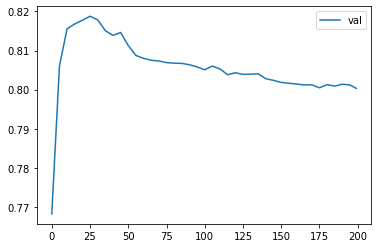

In [195]:
# plt.plot(df_scores.num_iter, df_scores.train_auc, label='train')
plt.plot(df_scores.num_iter, df_scores.val_auc, label='val')
plt.legend()


## 6.8 XGBOOST parameter

Tuning the following parameters:
    
•	eta

•	max_depth

•	min_child_weight


In [219]:
scores = {}

In [208]:
%%capture output


xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread':8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)


In [209]:
# tuning eta
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.05'

In [214]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.01', 'eta=1.0', 'eta=0.1', 'eta=0.05'])

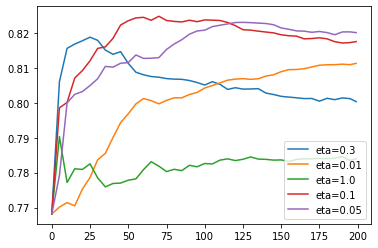

In [217]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)
plt.legend()

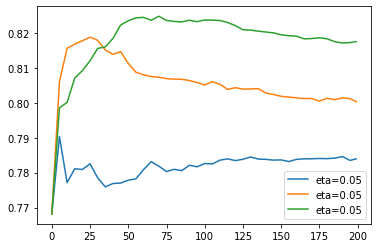

In [218]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']

for eta in etas:
    df_scores = scores[eta]
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)
plt.legend()

In [220]:
scores = {}

In [231]:
# tuning max_depth
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [230]:
%%capture output


xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread':8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)


In [235]:
del scores['max_depth=10']

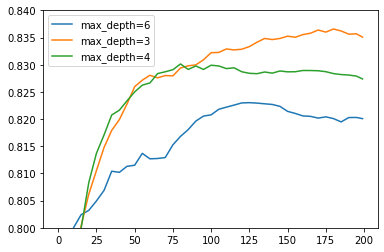

In [236]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)

plt.ylim(0.8, 0.84)    
plt.legend()

In [241]:
scores ={}


In [250]:
# tuning min_child_weight
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [249]:
%%capture output


xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread':8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, 
                  evals=watchlist,
                  verbose_eval=5,
                  num_boost_round=200)


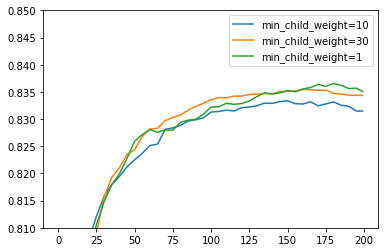

In [252]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)

plt.ylim(0.81, 0.85)    
plt.legend()

In [270]:
%%capture output


xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread':8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)


In [271]:
y_pred = model.predict(dval)

In [272]:
roc_auc_score(y_val, y_pred)

0.8360387251459157

Other parameters: https://xgboost.readthedocs.io/en/latest/parameter.html

Useful Ones:
    
•	subsample and colsample_bytree

•	lambda and alpha


## 6.9 Selecting the final model 

•	Choosing between xgboost, random forest and decision tree

•	Training the final model

•	Saving the model


In [273]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.7733374100893656

In [274]:
rf = RandomForestClassifier(n_estimators=160, 
                            max_depth=max_depth,
                            min_samples_leaf=min_sample_leaf,
                            random_state=1)
rf.fit(X_train, y_train)
    
y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
print(auc)

0.8256551064396599


In [275]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread':8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8360387251459157

In [277]:
df_full_train = df_full_train.reset_index(drop=True)

In [280]:
y_full_train = (df_full_train['status'] == 'default').astype(int).values

In [282]:
del df_full_train['status']

In [285]:
dicts_full_train = df_full_train.to_dict(orient='records')


dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [288]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names())


In [289]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight':1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread':8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=175)
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8322662626460096

## 6.10 . Summary

•	Decision tress learn if then-else rules from data.

•	Finding the best split: select the latest impure split. This algorithm can overfit, that’s why we control it by limiting the max depth and the size of the group.
    
•	Random forest is a way of combining multiple decision trees. It should have a diverse set of models to make good predictions

•	Gradient boosting trains model sequentially: each model tries to fix errors of the previous model. XGBoost is an implementation of gradient boosting.


## 6.11 Explore more 
•	For this dataset we didn’t do EDA or Feature Engineering. You can do it to get more insights into the problem.

•	For random forest, there are more parameters that we can tune. Check max_features and bootstrap.

•	There’s a variation of random forest called “extremely randomized trees”. Or “extra trees”.Instead of selecting
the best split among all possible thresholds. It selects a few thresholds randomly
and picks the best one ampng them. Because of that extra trees never overfit.
In Scikit-learn, they are implemented in ExtraTreesClassifier. Try it for this project.

•	XGBoost can deal with NAs – we don’t have to do fillna for it. Check if not filling NA’s help improve performance.

•	Experiment with other XGBoost parameters: subsample and colsample_bytree.
    
•	When selecting the best split, decision trees find the most useful features. 
This information can be used for understanding which features are more important than others. 
See example here for random forest( it’s the same for plain decision trees) and xgboost. 

•	Trees can be used for solving the regression problems: check 
DecisionTreeRegressor, RandomForestRegressor and the 
Objective=reg:squarederror parameter for XGBoost.
